[Table of Contents](table_of_contents.ipynb)

In [1]:
%matplotlib
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import sources.uebung.dsv1 as dsv1
import sources.dsvorg as do
import sources.dac as dac
import sources.bsfilter as bsfilter
import sources.classes.signal as sig

##  3 Signalverarbeitende Systeme
Signalverarbeitende Systeme verändern ein am Eingang anliegendes Signal $\left\{ x\left(n\right)\right\} $ in ein Ausgangssignal $\left\{ y\left(n\right)\right\} $. Dabei kann es sich um eine gezielte oder eine eigentlich nicht erwünschte Veränderung handeln. Mathematisch kann der Einfluss eines Systems wie folgt formuliert werden:

$\left\{ y\left(n\right)\right\} =S\left\{ \left\{ x\left(n\right)\right\} \right\} $

$ S $ ist der Systemoperator, der die Wirkung des Systems beschreibt. Es handelt sich dabei um eine Funktion, die auf die Eingangsfolge angewendet wird.

Mit Hilfe dieses mathematischen Apparates kann das Verhalten eines realen Systems modelliert werden. Auf der Basis dieser Modelle kann ein bestimmtes Verhalten analysiert und synthetisiert werden. Dieses Instrumentarium kann jedoch nur für sogenannte LTI-Systeme genutzt werden. LTI steht dabei für linear time invariant.

Ob ein System diese Eigenschaften aufweist kann ebenfalls mathematisch, aber auch messtechnisch überprüft werden. Für ein LTI-System gilt:

$\left\{ x\left(n\right)\right\} =k_{1}\left\{x_{1}\left\{ n\right\}\right\} +k_{2}\left\{x_{2}\left\{ n\right\}\right\} \rightarrow\left\{ y\left\{ n\right\} \right\} =k_{1}\left\{y_{1}\left\{ n\right\}\right\} +k_{2}\left\{y_{2}\left\{ n\right\}\right\}$ (Superpositionsprinzip)

$\left\{ x\left(n-t\right)\right\} \rightarrow\left\{ y\left(n-t\right)\right\} $ (Zeitinvarianz)

Ein Beispiel für eine messtechnische Untersuchung von Systemen soll im Folgenden demonstriert werden. 
- Das Eingangssignal `data1` ist eine Sinusschwingung mit Amplitude 1 und einer Dauer von 1s, die mit 16 kHz abgetastet wird. Die Frequenz des Signals ist wählbar.
- Das System 1 multipliziert dieses Signal mit einer Sinusschwingung wählbarer Frequenz (Amplitude 1, ATF = 16 kHz) (`data2`)
- Das System 2 addiert zu diesem Signal eine Sinusschwingung wählbarer Frequenz (Amplitude 1, ATF = 16 kHz)(`data3`)

Testen Sie das Verhalten (optisch, akustisch) mit unterschiedlichen Frequenzen (einschließlich f=0). Sind die Systeme linear oder nichtlinear? Welche Größe kann zur Erklärung herangezogen werden?


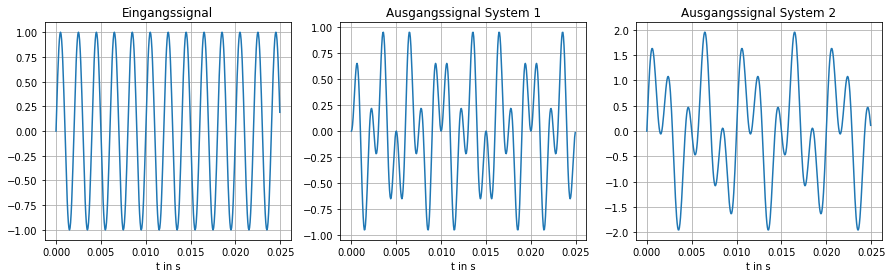

In [3]:
data1 = do.generate_signal(500)
data2 = do.sys1(data1, 200)
data3 = do.sys2(data1, 200)
do.plot_sig(data1, data2, data3)

In [5]:
Audio(data = data3, rate = 16000)

### 3.1 Digitale Signalverarbeitungssysteme
Digitale Systeme verarbeiten digitale, d. h. zeit- und wertdiskrete Signale. Diese Signale stammen meist aus der analogen Umwelt und die Ergebnisse sollen meist als analoge Größen ausgegeben werden. Um dies zu gewährleisten, muss eine entsprechende Signalwandlung erfolgen. 
<img src="image/sv_kette.jpg" height="200" width="500">
Für das Eingangssignal muss demnach die Abfolge Analogfilter - Abtaster - ADU und für das Ausgangssignal die Abfolge DAU - Abtaster - Rekonstruktionsfilter der in dem obigen Bild dargestellten Signalverarbeitungskette betrachtet werden.

### 3.2 Das Abtasttheorem
Um ein digitales aus einem analogen Signal zu erzeugen, muss dies abgetastet werden, d. h. der Signalverlauf zwischen 2 Abtastungen und die darin steckende Information wird nicht betrachtet. Damit steht die Frage wie oft und an welchen Stellen muss das Signal abgetastet werden, um möglichst keine Information zu verlieren.

Betrachtet man dieses Problem anhand einer Abtastwertefolge einer Sinusschwingung und versucht man, daraus durch Interpolation das analoge Signal zu erzeugen, kommt man zu dem Schluss:
- die Anzahl der Abtastwerte soll möglichst groß sein
- die Lage der Abtastwerte hat einen Einfluss auf den Rekonstruktionsfehler.

In den folgenden Zellen können Sie den Rekonstruktionsfehler veranschaulichen. Verändern Sie dazu die Werte `fS` und `lage`.

#### <font color="#FF0000">Eingabezelle</font>

In [16]:
fS = 2
lage = 0.1

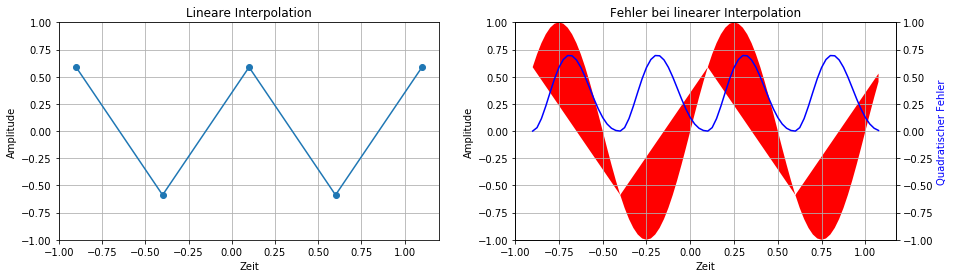

In [17]:
do.demo_samp1(fS, lage)

Das Abtasttheorem besagt jedoch, dass wenn Folgendes gilt:

$ f_{S}>2f_{max} $

mit $f_{S}$ ... Abtastfrequenz (sampling frequency) und $f_{max}$ ... größte im Signal enthaltene Frequenzkomponente, das Signal fehlerfrei aus den Abtastwerten rekonstruiert werden kann.

Für diese fehlerfreie Rekonstruktion ist folgende Vorschrift zur Generierung des Signalverlaufes erforderlich:

$x\left(t\right)=\underset{k}{\sum}x\left(\frac{k}{f_{S}}\right)sinc\left(\pi\left(1-\frac{t}{f_{S}}\right)\right)$

Dabei wird für jeden Abtastwert eine Spaltfunktion erzeugt, die an allen anderen Abtastwerten den Wert 0 hat. Diese wird mit dem Abtastwert gewichtet. Die Summe dieser gewichteten Spaltfunktionen ergibt das Originalsignal.

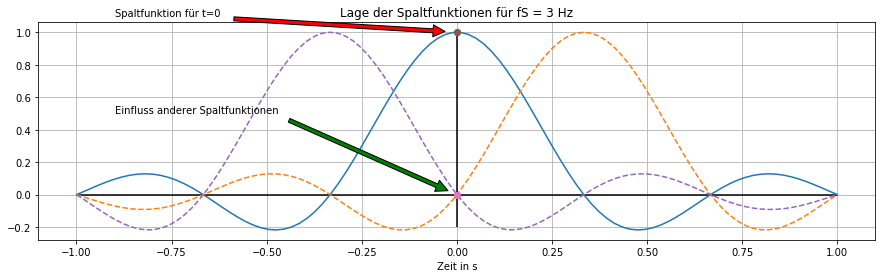

In [18]:
do.demo_samp2()

Die Lage der Spaltfunktionen wird durch die Abtastfrequenz bestimmt. Die Anzahl der Spaltfunktionen, die zur Berechnung der Originalfunktion verwendet werden, entspricht der Anzahl der Abtastwerte.

Im Folgenden kann der Einfluss beider Größen auf die Güte des Rekonstruktionsergebnisses untersucht werden.

#### <font color="#FF0000">Eingabezelle</font>

In [23]:
fS = 5
anz_p = 20

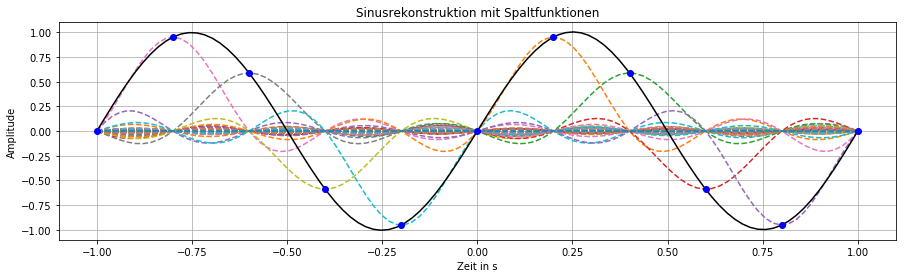

In [24]:
do.demo_samp3(fS, anz_p)

### 3.3 Abtastung
Die Theorie der Abtastung ist wichtig zur Abschätzung von Realisierbarkeit und Genauigkeit digitaler Signalverarbeitungsalgorithmen. Zu einem analogen Signal gehört ein eindeutiges (meist endliches) Spektrum. Das gilt nicht für digitale Signale, diese haben ein unendliches Spektrum. Wie kann das erklärt werden?

Zu einer Abtastwertefolge gehören unendlich viele Zeitfunktionen. Das soll an dem folgenden Beispiel verdeutlicht werden.
Eine Sinusschwingung der Frequenz 1 Hz wird mit einer Frequenz von 6 Hz abgetastet. Die entstehenden Abtastwerte könnten jedoch auch zu anderen Schwingungen (höherer positiver bzw. negativer Frequenzen) gehören.

In der folgenden Zelle wird eine passende zufällige Frequenz zwischen -23 Hz und 25 Hz angezeigt.

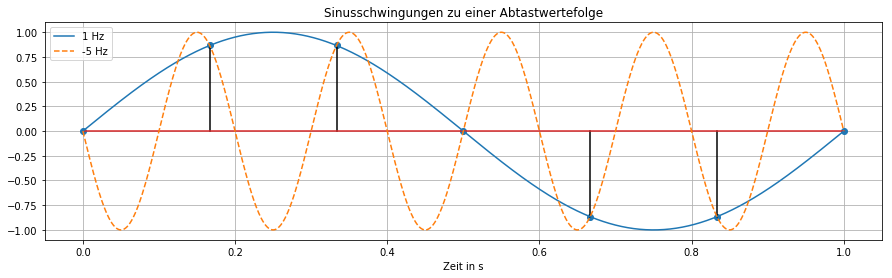

In [29]:
do.demo_aliasing()

Wie ist dieser Sachverhalt mathematisch zu beschreiben?

Die kontinuierliche Zeitfunktion: $ x\left(t\right)=sin\left(2\pi f_{0}t\right) $ wird bei $t = n \cdot t_{S}$ abgetastet. Dabei entsteht die Abtastwertefolge:

$ x\left(0\right)=sin\left(2\pi f_{0}0 \cdot t_{S}\right) $

$ x\left(1\right)=sin\left(2\pi f_{0}1 \cdot t_{S}\right) $

$ x\left(2\right)=sin\left(2\pi f_{0}2 \cdot t_{S}\right) $

...

$ x\left(n\right)=sin\left(2\pi f_{0}n \cdot t_{S}\right) $

Da die Sinusschwingung mit $2 \pi$ periodisch ist, kann auch geschrieben werden:

$ x\left(n\right)=sin\left(2\pi f_{0}nt_{S}\right)=sin\left(2\pi f_{0}nt_{S}+2\pi m\right)=sin\left(2\pi\left(f_{0}+\frac{m}{nt_{S}}\right)nt_{S}\right) $

Mit $m=kn$ entsteht:

$ x\left(n\right)= sin\left(2\pi\left(f_{0}+\frac{k}{t_{S}}\right)nt_{S}\right) = sin\left(2\pi\left(f_{0}+kf_{S}\right)nt_{S}\right) $

Das heißt, es kann nicht mehr entschieden werden, ob ein Abtastwert $x\left(n\right)$ von einer Sinusschwingung mit der Frequenz $f_{0}$ , $f_{0}+ f_{S}$, $f_{0} - f_{S}$, $f_{0} + 2f_{S}$ usw. gehört.

Diese Mehrdeutigkeit muss in der digitalen Signalverarbeitung immer beachtet werden. 

Die Einhaltung des Abtasttheorems gewährleistet, dass
- diese Mehrdeutigkeit bei der Interpretation beseitigt wird
- bei der Verarbeitung keine Fehler gemacht werden.

Nehmen wir an, wir tasten eine Sinusschwingung von 1 kHz mit einer Frequenz von 6 kHz ab. (Hinweis: Die Algorithmen der DSV arbeiten auch mit negativen Frequenzen (s. o. $k\in\mathbb{Z}$).) Durch die beobachtete Abtastwertefolge würden die Frequenzen ..., -7 kHz, -5 kHz, -1 kHz, 1 kHz, 5 kHz, 7 kHz, 11 kHz, 13 kHz, ... usw. dargestellt werden. Schränken wir den Frequenzbereich jedoch ein auf $-\frac{f_{S}}{2}<f<\frac{f_{S}}{2}$ ergibt sich nur noch die Frequenz $\pm1\: kHz$ bzw. die technische Frequenz 1 kHz.
<img src="image/abtasttheorem.jpg" height="300" width="600">

### 3.3.1 Abtastung von Tiefpasssignalen
Ein Tiefpasssignal enthält nur (messbare) Frequenzen unterhalb einer Grenzfrequenz B. Ein analoges Tiefpasssignal hat ein endliches Spektrum. Im oberen Teil der folgenden Abbildung ist das Spektrum dargestellt. Zur besseren mathematischen Handhabung wird das Spektrum auf negative Frequenzen erweitert. Wird das Signal abgetastet, entstehen Spiegelspektren. Für  $f_{S}>2B$ wird das Abtasttheorem eingehalten , d. h. das Frequenzgebiet des Originalspektrums wird nicht verändert, wie es im mittleren Teil des Bildes zu sehen ist. Wird die Abtastfrequenz jedoch verkleinert, rücken die Spiegelspektren zusammen und das Orgininalspektrum wird verändert (unterer Teil).
<img src="image/tp_alias.jpg" height="300" width="600">


Eine Konsequenz aus dieser Betrachtung ist, dass das Analogsignal vor der Abtastung mit einem analogen Tiefpass begrenzt werden muss, um zu verhindern, dass hohe Spektralanteile das Spektrum zwischen $-\frac{f_{S}}{2}$ und $\frac{f_{S}}{2}$ verändern.

Zur Demonstration soll ein akustisches Signal dienen. Eine Mischung von Tönen 1 kHz  und 4 kHz soll  mit 10 kHz und  mit 6 kHz abgetastet werden. Ändern Sie den Parameter (fS) entsprechend. Welche Frequenzen sind zu hören?

#### <font color="#FF0000">Eingabezelle</font>

In [32]:
fS = 6000

In [33]:
sig1 = do.generate_signal(1000,fS)
sig2 = do.generate_signal(4000,fS)
sig_sum = sig1 + sig2
Audio(data = sig_sum, rate = fS)

### 3.3.2 Abtastung von Bandpasssignalen 
Das Abtasttheorem besagt, dass die Abtastfrequenz größer als das Doppelte der höchsten, im Signal enthaltenen Frequenz sein muss. Das gilt, wie gerade gezeigt, für Tiefpasssignale. 

Bandpasssignale enthalten nur Frequenzen zwischen $f_{gu}$ und $f_{go}$. Eine Abtastung mit einer Frequenz $f_{S} > 2f_{go}$ erfüllt das Abtasttheorem und erlaubt eine fehlerfreie Rekonstruktion des Signals. Die folgende Abbildung zeigt das Resultat im Frequenzbereich. Ein Bandpasssignal zwischen 0,8 kHz und 1 kHz wird mit 2 kHz abgetastet. Mit dem grün dargestellten idealen Bandpass kann das Originalsignal aus den Abtastwerten rekonstruiert werden.
<img src="image/bandpass_1.jpg" height="400" width="800">
Das oben dargestellte Spektrum weist große Lücken auf, die aus der Wahl der Abtastfrequenz resultieren. Wird die Abtastfrequenz herabgesetzt, verändert sich das Spektrum. Wie die folgende Abbildung zeigt, ist aber auch hier die fehlerfreie Rekonstruktion möglich.
<img src="image/bandpass_2.jpg" height="400" width="800">
Eine weitere Veränderung der Abtastfrequenz hat unter Umständen den im Folgenden gezeigten Effekt, dass die Anforderungen an den Rekonstruktionsbandpass verringert werden können.
<img src="image/bandpass_3.jpg" height="400" width="800">
Die Wahl der Abtastfrequenz kann jedoch auch so erfolgen, dass es zu einer Überlagerung der Spiegelspektren kommt und das Signal nicht fehlerfrei rekonstruiert werden kann, bzw. dass es zu einem Informationsverlust durch die Abtastung kommt.
<img src="image/bandpass_4.jpg" height="400" width="800">

Bei der Wahl der Abtastfrequenz ist Folgendes zu beachten. Damit es nicht zur Überlappung der Spiegelspektren kommt, muss gelten:
<img src="image/bandpass_5.jpg" height="200" width="400">
$-f_{gu}+\left(m-1\right)f_{S}\leq f_{gu}$ und $-f_{go}+mf_{S}\geq f_{go}$

Damit gilt für die Abtastfrequenz:

$\frac{2f_{gu}}{m-1}\geq f_{S}\geq\frac{2f_{go}}{m}$ mit $m\in\mathbb{N}$

Die Werte für die Konstante $m$ liegen zwischen 1 und einer Obergrenze, die sich aus $\frac{2f_{gu}}{m-1}\geq\frac{2f_{go}}{m}$ ergibt.

$1\leq m\leq\frac{f_{go}}{f_{go}-f_{gu}}$
    

### 3.4 Rekonstruktion abgetasteter Signale

Nach der Verarbeitung des digitalen Signals durch ein digitales Signalverarbeitungssystem muss dieses wieder in ein analoges Signal (zeit- und wertkontinuierlich) zurückgewandelt werden. Dies geschieht mit einem Digital-Analog-Wandler.
Aus den vorangegangenen Betrachtungen wissen wir, dass die Abtastung zu Veränderungen im Spektrum führt (periodische Wiederholung). Weiterhin wurde bereits erwähnt, dass bei Einhaltung des Abtasttheorems, das Signal fehlerfrei aus den Abtastwerten rekonstruiert werden kann.

#### 3.4.1 Vorbetrachtungen

#### Analoge harmonische Schwingungen im Zeit- und Frequenzbereich
Ein kontinuierliches periodisches Signal im Zeitbereich hat ein (endliches) Linienspektrum. Dieses Spektrum beschreibt, aus welchen Harmonischen (Amplitude, Frequenz, Nullphasenwinkel) das Signal aufgebaut ist.

In der folgenden Zelle können Sie ein Signal aus 1 bis 3 Harmonischen (Basisfrequenz und ganzzahlige Vielfache) kombinieren und anschließend im Zeit- und Frequenzbereich darstellen. Der dargestellte Frequenzbereich kann bis 1024 Hz umfassen.

In [34]:
f1 = 2
f2 = 6
f3 = 12
fmax = 256

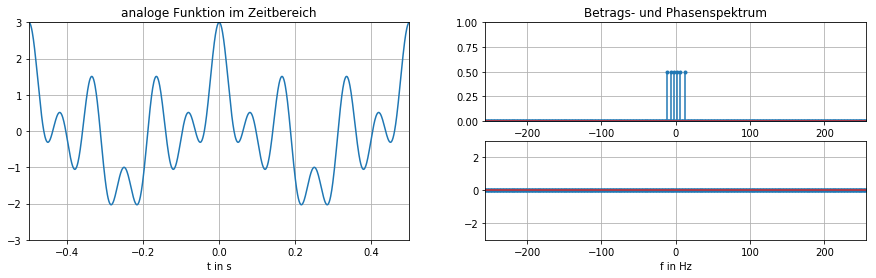

In [35]:
y = dac.analog_t(f1=f1, f2=f2, f3=f3)
dac.analog_f(y, fmax=fmax)

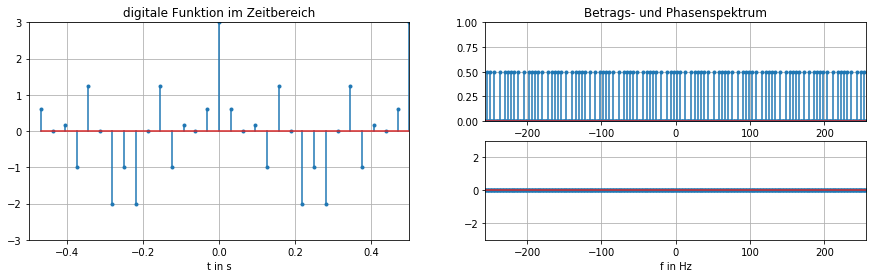

In [36]:
y = dac.digital_t(f1=f1, f2=f2, f3=f3, fS=32)
if len(y) > 0:
    dac.digital_f(y, fmax=fmax)

#### Zeitsignal aus der Beschreibung im Frequenzbereich generieren
Die Darstellung des Signals im Frequenzbereich ist eine Bildungsvorschrift für das kontinuierliche Signal. Für alle Spektralkoeffizienten wird eine harmonische Schwingung erzeugt (z. B. $A \cdot sin(2\pi f \cdot t + \phi$). Diese werden addiert und ergeben den Zeitverlauf des Signals.

Für das kontinuierliche Signal ist das Spektrum endlich und kann somit vollständig zur Konstruktion des Zeitsignals verwendet werden. Abgetastete Signale haben ein unendliches Spektrum. Es ist somit zu erwarten, dass je mehr Spektralkoeffizienten zur Konstruktion des Zeitsignals verwendet werden, dieses umso mehr dem abgetasteten Signal ähnelt.

In der folgenden Zelle können Sie ein kontinuierliches Signal aus maximal 3 Spektralkoeffizienten `fx = [amplitude, frequenz]` erzeugen. Desweiteren können Sie testen, wie durch die Einbeziehung der Spiegelspektren ein abgetastetes Signal im Zeitbereich entsteht. Für dieses Experiment ist die Abtastfrequenz mit 16 Hz festgelegt.

#### <font color="#FF0000">Eingabezelle</font>

In [43]:
f1 = [0.5, 1]
f2 = [0.5,2]
f3 = [0.5,4]
anz_spek = 1000

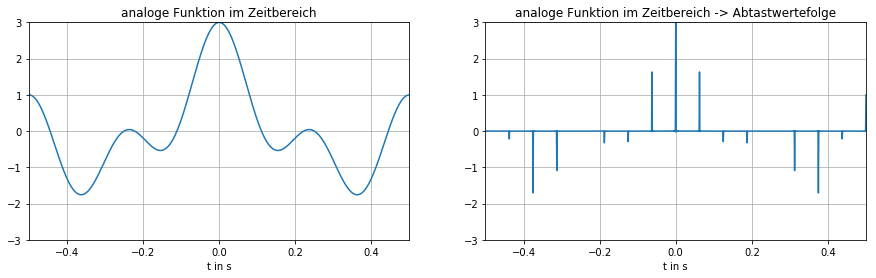

In [44]:
dac.generate_analog_sig(f1=f1, f2=f2, f3=f3)
dac.generate_dig_sig(f1=f1, f2=f2, f3=f3, anz_spek=anz_spek)

#### 3.4.2 Verfahren zur Rekonstruktion von Signalen
Die zu realisierende Aufgabe wurde bereits formuliert. Aus einem digitalen Signal soll ein zeitkontinuierliches Signal erzeugt werden. Naheliegend die Anwendung des sogenannten Sample & Hold Verfahrens. Dabei wird z. B. ein Spannungswert, der dem Binärwert des digitalen Signals entspricht solange kontinuierlich ausgegeben, bis der nächste Wert vorliegt. Dieses Verfahren erzeugt ein zeitkontinuierliches Signal, das jedoch nicht genau dem Signal vor der Abtastung entspricht.

Aus den Vorbetrachtungen lässt sich jedoch noch ein weiteres Verfahren ableiten. Aus dem digitalen Signal entsteht das zugehörige Originalsignal, wenn die Spiegelspektren entfernt werden. In diesem Fall ist eine Tiefpassfilterung erforderlich. Mit diesem Verfahren ist das Signal bei Einhaltung des Abtasttheorems ideal rekonstruierbar.

Beide Verfahren sollen im Folgenden beschrieben und hinsichtlich ihrer Wirkungen im Zeit- und Frequenzbereich des Signals betrachtet werden.

#### 3.4.3 Sample & Hold
In der folgenden Zelle wird das Verfahren veranschaulicht. Dazu wird ein Gemisch aus drei Harmonischen erzeugt und dargestellt. Weiterhin wird die Abtastwertefolge und das Sample & Hold Signal dargestellt. Dazu werden 1024 Werte betrachtet. Das entspricht einer Zeit von 1 s.

#### <font color="#FF0000">Eingabezelle</font>

In [ ]:
f1 = 2
f2 = 16
f3 = 0
fS = 64

In [ ]:
data = dac.analog_sig(f1=f1, f2=f2, f3=f3)
dac.sample_hold(data, fS=fS)

Der durch das Sample & Hold Verfahren bedingte Effekt soll jetzt hörbar gemacht werden. Dazu wird ein Signalgemisch durch Addition zweier Harmonischer (mit `f1`und `f2`) erzeugt. Aus diesem wird ein Sample & Hold Signal erzeugt, indem ein Abtastwert `16000/fS` Werte gehalten wird. (Zulässige Werte für `fS` sind: `16000, 8000, 4000, 2000, 1000, 500`).
Die durch das Verfahren entstehenden hohen Frequenzen werden durch Tiefpassfilterung entfernt.

#### <font color="#FF0000">Eingabezelle</font>

In [ ]:
f1 = 800
f2 = 1800
fS = 4000

In [ ]:
data1 = do.generate_signal(f1)
data2 = do.sys2(data1, f2)
data3 = dac.sample_hold_audio(data2,fS=fS)

In [ ]:
data3_filt = bsfilter.filter_appl(16000, data3, fgu=0, fgo=fS/2, order=10, typ='lp')
y = np.fft.fft(data3_filt)/len(data3_filt)
y1 = np.abs(np.fft.fftshift(y))
f = np.linspace(-8000,7999,16000)
plt.axis([-fS/2,fS/2,0,1])
plt.grid(True)
plt.title('Spektrum des Sample & Hold Signals')
plt.plot(f,y1)

In [ ]:
audio = np.append(data2, data3_filt)
Audio(data = audio, rate = 16000)

Mathematisch wird die Sample &  Hold Rekonstruktion durch eine Faltung der Abtastwerte mit einer Rechteckfunktion beschrieben.
<img src="image/sh1.jpg" height="300" width="600">
Die Abbildung zeigt die Rechteckfunktion, die für die Dauer eines Abtastintervalls den Wert 1 hat. Ein Abtastwert wird mit dieser Funktion gefaltet. (Die Faltungsoperation (Symbol $\ast$) wird später genauer erläutert.) Diese spezielle Funktion überführt die diskreten Abtastwerte in ein zeitkontinuierliches Signal. Für die einfachere mathematische Beschreibung wird die Rechteckfunktion symmetrisch zu den Abtastwerten angeordnet. Damit gilt:

$x\left(t\right)=\left\{ x\left(n\right)\right\} \ast h\left(t\right)$

Diese Operation wirkt sich auch auf den Frequenzgehalt des Signals aus. In den obigen Hörbeispielen nimmt man zunächst ein "Klirren" wahr, dass aus den Sprüngen im Signalverlauf resultiert. Darüber hinaus ist auch noch eine Dämpfung der höheren Frequenzkomponente des Signals zu bemerken. 

Eine Faltung im Zeitbereich ist verbunden mit einer Multiplikation des Signalspektrums mit Darstellung der Rechteckfunktion im Frequenzbereich. (Die Transformation von Funktionen zwischen Zeit- und Frequenzbereich ist Gegenstand des nächsten Abschnittes. Jetzt wird die Transformation ohne Ableitung angegeben.)

Zu einer kontinuierlichen Rechteckfunktion im Zeitbereich gehört eine kontinuierliche Spaltfunktion im Frequenzbereich. Die Spaltfunktion ist wie folgt definiert:

$sp(x)=\frac{sin\left(x\right)}{x}$

Zu einem Rechteckimpuls der Dauer $T_{S}$ und der Höhe $1/T_{S}$ gehört eine Spaltfunktion mit dem Maximalwert 1 und Nulldurchgängen bei $f=n \cdot 1/T_{S}=n\cdot f_{S}$.
<img src="image/sh2.jpg" height="300" width="600">

Das Sample & Hold Verfahren bewirkt eine Veränderung des Signalspektrums, da das Originalspektrum mit dieser Spaltfunktion multipliziert wird. Da deren Maximalwert 1 ist, werden alle Frequenzen gedämpft und das rekonstruierte Signal entspricht auch bei Einhaltung des Abtasttheorems nicht dem Originalsignal.
<img src="image/sh3.jpg" height="300" width="400">

Da es sich hierbei um einen systematischen Fehler des Rekonstruktionsverfahrens handelt, kann die Qualität des Gesamtsystem mit folgenden 2 Maßnahmen verbessert werden.

1. Man wählt eine Abtastfrequenz, die größer als das Doppelte der höchsten Signalfrequenz ist.
2. Man verstärkt die Signalfrequenzen vorher so, dass die Dämpfung des S & H Verfahrens diese Verstärkung rückgängig macht.

<img src="image/sh4.jpg" height="300" width="800">

#### 3.4.4 Ideale Rekonstruktion
Aus den Vorüberlegungen und den Ausführungen zur Sample & Hold Rekonstruktion kann das Verfahren der idealen Rekonstruktion abgeleitet werden. 
- Bei der Abtastung entsteht ein unendliches periodisches Spektrum, d.h. wenn die Wiederholungen im Spektrum entfernt werden, entsteht im Zeitbereich das ideale kontinuierliche Signal.
- Dazu ist im Frequenzbereich die Anwendung eines (idealen) Tiefpassfilters erforderlich. Das Spektrum des abgetasteten Signals wird mit der Übertragungsfunktion des idealen Tiefpasses multipliziert.
- Diese Multiplikation im Frequenzbereich führt im Zeitbereich dazu, dass die Abtastwerte mit der Fourierrücktransformierten der Übertragungsfunktion des Tiefpasses gefaltet werden.

<img src="image/irek1.jpg" height="300" width="800">

Die Abbildung zeigt den idealen Tiefpass, der im Frequenzbereich alle Anteile oberhalb $f_{S}/2$ durch Multiplikation mit dem Spektrum des Signals entfernt. Bei Einhaltung des Abtasttheorems gibt es oberhalb dieser Frequenz keine Anteile des kontinuierlichen Signals. Diese Operation führt im Zeitbereich dazu, dass "an" jedem Abtastwert eine Spaltfunktion gebildet wird. Die Summe dieser gewichteten Spaltfunktionen ergibt das Originalsignal. Dieses Vorgehen wird durch dir Faltung im Zeitbereich beschrieben:

$x(t)=\left\{ x\left(n\right)\right\} \ast FT^{-1}\left\{ H_{TP}\left(f\right)\right\} =\sum\left\{ x\left(n\right)\right\} sp\left(t\cdot f_{S}\right)$

In der folgenden Zelle können Sie die ideale Rekonstruktion testen. Für einen Zeitabschnitt von 3 Sekunden können Sie ein kontinuierliches Signal aus maximal 3 Frequenzkomponenten erstellen (Originalsignal). Dieses wird mit einer wählbaren Frequenz (Zweierpotenz) abgetastet und anschließend rekonstruiert.

#### <font color="#FF0000">Eingabezelle</font>

In [45]:
f1 = 10
f2 = 2
f3 = 5
fS = 32

C:\Users\flach\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


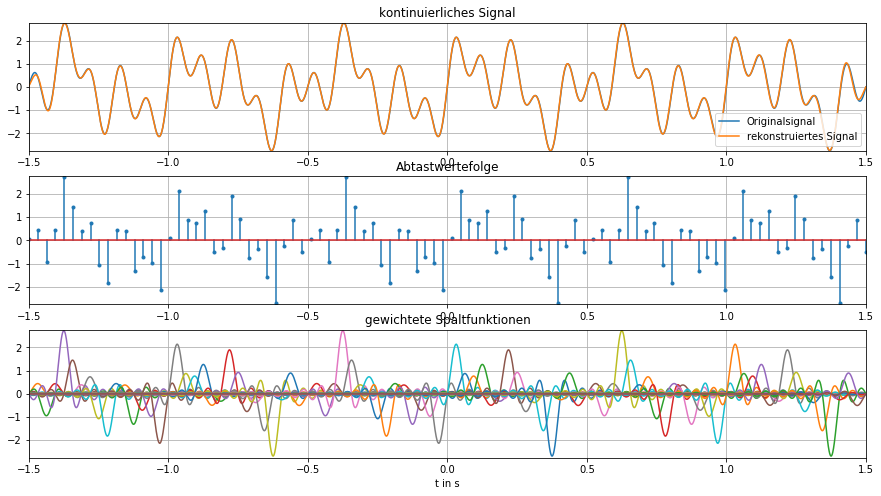

In [46]:
dac.analog_reko(f1=f1, f2=f2, f3=f3,fS=fS)